In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score as R2
from sklearn.metrics import mean_squared_error as MSE

In [2]:
data = pd.read_csv('/Volumes/Database/Research/C7 Multivariate analysis/MRI-ESM2-0_diag_2014(0318).csv')

In [3]:
country = pd.read_csv('/Users/csuen/Desktop/PhD/Maps/country_province_state_2*2.csv')
data = data.merge(country, how = 'left', left_on = ['longitude','latitude'], right_on = ['longitude','latitude'])
data = data.drop(['province','state'], axis=1)

### First, converse the concentrations in ppb to molecules cm${^{-3}}$

In [4]:
data['o3_mole'] = data['o3']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['no_mole'] = data['no']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['no2_mole'] = data['no2']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['oh_mole'] = data['oh']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['h2o_mole'] = data['h2o']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['hno3_mole'] = data['hno3']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['pan_mole'] = data['pan']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)

data['k_ho2_ho2'] = 2.2*10**(-13)*np.exp(600/data['tas'])
data['k_oh_no2'] = 6.5*10**(-11)
data['k_o1d_h2o'] = 2.14*10**(-10)

data['o3prod_mole'] = data['o3prod']*6.022*10**17
data['o3loss_mole'] = data['o3loss']*6.022*10**17

data['lossch4_mole'] = data['lossch4']*6.022*10**17
data['lossco_mole'] = data['lossco']*6.022*10**17
data['k_ch3o2_ch3o2'] = 1.03*10**(-13)*np.exp(365/data['tas'])

In [5]:
data['k_no_ho2'].median()

8.541200351715088e-12

In [6]:
data['k_no_ch3o2'].median()

8.173369276523589e-12

In [7]:
data['k_o3_oh'].median()

6.202684883028268e-14

In [8]:
data['k_o3_ho2'].median()

1.812129009796305e-15

In [9]:
data['k_ch3o2_ch3o2'].median()

3.7252786956941056e-13

In [10]:
data['a'] = 2*data['k_ho2_ho2']
data['b'] = data['k_o3_ho2']*data['o3_mole'] + data['k_no_ho2']*data['no_mole']
data['c'] = -data['lossco_mole'] - data['k_o3_oh']*data['o3_mole']*data['oh_mole']

In [11]:
data['ho2_mole'] = (-data['b'] + np.sqrt(data['b']**2 - 4*data['a']*data['c']))/(2*data['a'])

In [12]:
data['ho2_mole'].describe()

count    9.720000e+05
mean     8.642662e+07
std      8.480762e+07
min      9.692527e+03
25%      1.451592e+07
50%      5.873797e+07
75%      1.453755e+08
max      6.176854e+08
Name: ho2_mole, dtype: float64

In [13]:
data['oh_mole'].describe()

count    9.720000e+05
mean     1.561070e+06
std      1.764012e+06
min      3.873581e+01
25%      2.056745e+05
50%      1.013260e+06
75%      2.275798e+06
max      1.995531e+07
Name: oh_mole, dtype: float64

In [14]:
data['ratio_ho2_oh'] = data['ho2_mole']/data['oh_mole']
data['ratio_ho2_oh'].describe()

count    972000.000000
mean        109.473321
std          81.313451
min           0.219355
25%          42.725748
50%         103.023208
75%         159.981813
max         535.860211
Name: ratio_ho2_oh, dtype: float64

In [15]:
data['P1'] = data['k_no_ho2']*data['no_mole']*data['ho2_mole']
data['P1_frac'] = data['P1']/data['o3prod_mole']
data['P1_frac'].describe()

count    972000.000000
mean          0.337509
std           0.162965
min           0.000312
25%           0.258439
50%           0.324386
75%           0.424497
max           1.072218
Name: P1_frac, dtype: float64

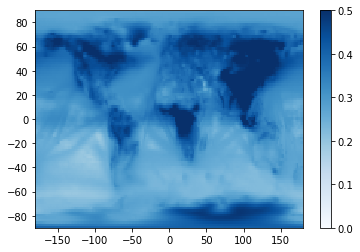

In [16]:
data['loc'] = data['longitude']*1000 + data['latitude']
data_land = data
data_mean = data_land.groupby(['loc']).mean()

cm = plt.cm.get_cmap('Blues')
x = data_mean['longitude']
y = data_mean['latitude']
z = data_mean['P1_frac']
sc = plt.scatter(x, y, c=z, marker="s", vmin=0, vmax=0.5, s=3, cmap=cm)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.colorbar(sc)
plt.show()

In [17]:
data_mean['P1_frac'].describe()

count    16200.000000
mean         0.337509
std          0.088230
min          0.184010
25%          0.270421
50%          0.320198
75%          0.396089
max          0.738958
Name: P1_frac, dtype: float64

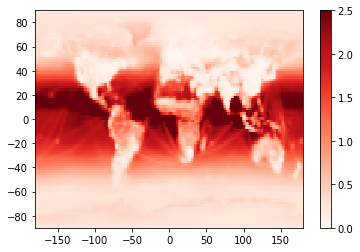

In [18]:
data['loc'] = data['longitude']*1000 + data['latitude']
data_land = data
data_mean = data_land.groupby(['loc']).mean()

cm = plt.cm.get_cmap('Reds')
x = data_mean['longitude']
y = data_mean['latitude']
z = data_mean['ho2_mole']*10**(-8)
sc = plt.scatter(x, y, c=z, marker="s", vmin=0, vmax=2.5, s=3, cmap=cm)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.colorbar(sc)
plt.show()

In [19]:
data = data.drop(['a','b','c'], axis=1)
data

,longitude,latitude,t,loc,o3,o3prod,o3loss,eminox,emivoc,tas,...,k_oh_no2,o3prod_mole,o3loss_mole,lossch4_mole,lossco_mole,k_ch3o2_ch3o2,ho2_mole,ratio_ho2_oh,P1,P1_frac
0,1.0,-89.0,1.0,911.0,1.881623e-08,1.151662e-13,1.267580e-13,0.000000e+00,0.000000e+00,250.29199,...,6.500000e-11,69353.079618,76333.685666,53995.351269,92983.955620,4.427591e-13,6.505552e+07,57.086252,46762.753048,0.674271
1,3.0,-89.0,1.0,2911.0,1.881521e-08,1.150717e-13,1.264709e-13,0.000000e+00,0.000000e+00,250.12376,...,6.500000e-11,69296.171718,76160.775980,53872.504878,92919.417846,4.431936e-13,6.496410e+07,56.935796,46807.198692,0.675466
2,5.0,-89.0,1.0,4911.0,1.881329e-08,1.149488e-13,1.261420e-13,0.000000e+00,0.000000e+00,250.03404,...,6.500000e-11,69222.149294,75962.688312,53733.041380,92843.932076,4.434257e-13,6.489061e+07,56.828678,46828.843303,0.676501
3,7.0,-89.0,1.0,6911.0,1.881115e-08,1.147325e-13,1.257041e-13,0.000000e+00,0.000000e+00,249.96370,...,6.500000e-11,69091.911500,75698.996976,53544.016822,92682.837554,4.436079e-13,6.478059e+07,56.745930,46797.793916,0.677327
4,9.0,-89.0,1.0,8911.0,1.880953e-08,1.145785e-13,1.254009e-13,0.000000e+00,0.000000e+00,249.93759,...,6.500000e-11,68999.172700,75516.446068,53413.770597,92595.506510,4.436756e-13,6.472526e+07,56.671437,46793.889044,0.678180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971995,-9.0,89.0,60.0,-8911.0,4.140486e-08,3.237832e-16,9.027561e-16,1.136441e-13,2.367481e-16,254.84529,...,6.500000e-11,194.982267,543.639723,82.354909,372.117687,4.313719e-13,2.335621e+05,313.077256,2.749903,0.014103
971996,-7.0,89.0,60.0,-6911.0,4.140422e-08,3.260785e-16,9.182633e-16,9.444109e-14,1.967354e-16,254.86888,...,6.500000e-11,196.364473,552.978159,83.741053,378.688351,4.313147e-13,2.376725e+05,313.493601,2.747298,0.013991
971997,-5.0,89.0,60.0,-4911.0,4.140335e-08,2.955961e-16,8.787902e-16,2.331798e-17,0.000000e+00,254.89876,...,6.500000e-11,178.007989,529.207440,80.554301,363.073040,4.312423e-13,2.280103e+05,314.185277,2.323839,0.013055
971998,-3.0,89.0,60.0,-2911.0,4.140186e-08,2.996158e-16,8.724657e-16,2.333118e-14,4.856588e-17,254.92984,...,6.500000e-11,180.428605,525.398845,79.673192,360.314627,4.311670e-13,2.261492e+05,314.790694,2.425858,0.013445


In [20]:
data.to_csv('/Volumes/Database/Research/C7 Multivariate analysis/MRI-ESM2-0_diag_2014(0319).csv', index = False)